In [1]:
import os
import json
import pandas as pd
import glob
import numpy as np
import time
import textstat
import re, math
from git import Repo
import git
import pprint
import javalang
import requests
import json
import scipy.stats as stats
from scipy.stats import chisquare
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [39]:
data = pd.DataFrame()
data = pd.read_csv('data/checkstyle_metrics1.csv')
data

,CFltFix,cloc,CPathDepth,CCurSt,experience,EFltDens,TChurn,TPC,NumOfBursts,SLBurst,...,EEvPattern,EConChg,EIncChg,EConStChg,EIncStChg,EFltsConStChg,EFltIncStChg,EChgTimeInt,buggy,gen
0,False,38,7,C,212,0.0,4,1,1,1,...,SYNC,1,0,1,0,0,0,0.4,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
1,False,38,7,I,213,0.0,6,2,1,2,...,DIV,1,1,1,0,0,1,0.1,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
2,False,38,7,I,260,0.0,6,3,1,2,...,DIV,1,2,1,1,0,1,64.5,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
3,False,38,7,I,279,0.0,6,4,1,2,...,DIV,1,3,1,2,0,1,14.8,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
4,False,38,7,I,301,0.0,21,5,1,2,...,DIV,1,4,1,3,0,1,10.2,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
5,False,38,7,I,338,0.0,3,6,1,2,...,DIV,1,5,1,4,0,1,19.9,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
6,False,38,7,I,347,0.0,2,7,1,2,...,DIV,1,6,1,5,0,1,4.8,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
7,False,38,7,C,128,0.0,14,8,1,2,...,LP,2,6,1,5,1,1,2.6,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
8,False,38,7,C,153,0.0,14,9,1,2,...,LP,3,6,2,5,1,1,20.7,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."
9,False,38,7,I,8,0.0,44,10,1,2,...,LPDIV,3,7,2,5,1,2,12.2,False,"C,4065b43,4-I,1a7694f,6-I,c682b57,6-I,7b7eea6,..."


In [42]:
data = pd.DataFrame()
projects = ["druid","netty","muikku","framework","checkstyle","gatk","realm", "nd4j","rxjava","k"]
for p in projects:
    data1 = pd.read_csv('data/'+p+'_metrics1.csv')
    data1['project'] = p
    print(p,len(data1))
    data = data.append(data1, ignore_index= True)
    
data

druid 251640
netty 25834
muikku 48929
framework 28001
checkstyle 44647
gatk 36486
realm 34815
nd4j 114266
rxjava 19216
k 18314


,CFltFix,cloc,CPathDepth,CCurSt,experience,EFltDens,TChurn,TPC,NumOfBursts,SLBurst,...,EConChg,EIncChg,EConStChg,EIncStChg,EFltsConStChg,EFltIncStChg,EChgTimeInt,buggy,gen,project
0,False,28,0,C,20,0.0,5,1,0,0,...,1,0,1,0,0,0,27.5,False,"C,A,0f63cb4,5-C,A,017d477,24-I,A,e042c29,23-I,...",druid
1,False,28,0,C,2,0.0,24,2,0,0,...,2,0,2,0,0,0,64.2,False,"C,A,0f63cb4,5-C,A,017d477,24-I,A,e042c29,23-I,...",druid
2,False,28,0,I,4,0.0,23,3,0,0,...,2,1,2,0,0,1,22.7,True,"C,A,0f63cb4,5-C,A,017d477,24-I,A,e042c29,23-I,...",druid
3,False,28,0,I,82,0.0,28,4,0,0,...,2,2,2,1,0,1,24.0,True,"C,A,0f63cb4,5-C,A,017d477,24-I,A,e042c29,23-I,...",druid
4,False,61,0,I,35,0.0,51,1,0,0,...,0,1,0,1,0,0,99.2,True,"I,A,f946fc3,51-I,A,ff325b1,33-I,B,3fa4698,54-I...",druid
5,False,61,0,I,45,0.0,33,2,0,0,...,0,2,0,2,0,0,14.2,True,"I,A,f946fc3,51-I,A,ff325b1,33-I,B,3fa4698,54-I...",druid
6,False,61,0,I,82,0.0,54,3,0,0,...,0,3,0,3,0,0,24.9,True,"I,A,f946fc3,51-I,A,ff325b1,33-I,B,3fa4698,54-I...",druid
7,False,61,0,I,84,0.0,10,4,1,1,...,0,4,0,4,0,0,0.0,True,"I,A,f946fc3,51-I,A,ff325b1,33-I,B,3fa4698,54-I...",druid
8,False,48,1,C,81,0.0,4,1,0,0,...,1,0,1,0,0,0,112.6,True,"C,AB,dc3459d,4-C,B,f8c54a7,2-C,AB,3fa4698,11-C...",druid
9,False,48,1,C,88,0.0,2,2,0,0,...,2,0,2,0,0,0,6.0,True,"C,AB,dc3459d,4-C,B,f8c54a7,2-C,AB,3fa4698,11-C...",druid


## RQ1 - Types of LPs

In [43]:
data['type'] = ''

for i in range(len(data)):
    tokens = str(data.loc[i,'gen']).split('-')
    gen_pattern_str =''
    gen_str = ''
    last_state = None
    for token in tokens:
        gen_str += str(token).split(',')[0]
    for current_state in gen_str:
        if current_state != last_state:
            gen_pattern_str += current_state
        last_state = current_state
    if 'CIC' in gen_pattern_str or 'IC' in gen_pattern_str:
        result = checkPattern(tokens)
        data.loc[i,'type'] = result
        
            

AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB A A -> 
AB A A -> 
AB A A -> 
AB A A -> 
AB A A -> 
AB A A -> 
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A AB -> LP3
A A AB -> LP3
B A AB -> 
B A AB -> 
B A AB -> 
B A AB -> 
B A AB -> 
B A AB -> 
B A AB -> 
B A AB -> 
B A AB -> 
A A A -> LP8
A A A -> LP8
A A A -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
B B B -> LP8
B B B -> LP8
AB AB AB -> LP

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> 

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB 

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B

AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8


AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
A 

AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
AB AB 

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB

A A B -> LP1
A A B -> LP1
A A B -> LP1
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
A A AB -> LP3
A A AB -> L

A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A A B

AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP

A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB

AB AB AB -> LP7
AB B B -> 
AB B B -> 
AB B B -> 
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
A BA B -> LP2
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1

AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -

AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B B -> 
AB B B -> 
AB B B -> 
AB B B -> 
AB B B -> 
AB B B -> 
AB B B -> 
AB B B -> 
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6


AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB 

AB AB AB -> LP7
AB AB AB -> LP7
A B AB -> 
A B AB -> 
A B AB -> 
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
A A A -> LP8
A A A -> LP8
A A A -> LP8
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
B A B -> 
B A B -> 
B A B -> 
B A B -> 
B A B -> 
B A B -> 
B A B -> 
B A B -> 
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
A AB A -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
B AB B -> LP4
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7

A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
B AB AB -> LP5
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> 

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A A -> LP8
A A A

B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB ->

97bee78 0f58857 8798645 -> 
97bee78 0f58857 8798645 -> 
97bee78 0f58857 8798645 -> 
97bee78 0f58857 8798645 -> 
97bee78 0f58857 8798645 -> 
97bee78 0f58857 8798645 -> 
97bee78 0f58857 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
97bee78 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
5cfe30d 97bee78 8798645 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca6a5 -> 
89a51ba 89a51ba b8ca

a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 871b20e -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
a13ebd4 0ac6fe4 167dd96 -> 
c2ce485 a13ebd4 167dd96 -> 
c2ce485 a13ebd4 167dd96 -> 
c2ce485 a13ebd4 167d

a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6fe4 -> 
a13ebd4 a13ebd4 0ac6

871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791ddf0 -> 
871b20e 871b20e 791d

A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A AB -> LP3
A A AB -> LP3
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> L

A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
A A A -> LP8
A A A -> LP8
A A A -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A A -> LP8
A A A -> LP8
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
B A B -> 
B A B -> 
B A B -> 
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
B B B -> LP8
B B B -> LP8
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A 

B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B BA AB -> LP5
B BA AB -> LP5
B BA AB -> LP5
B BA AB -> LP5
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B BA AB -> LP5
B BA AB -> LP5
B BA AB -> LP5
B BA AB -> LP5
B BA AB -> LP5
B BA AB -> LP5
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A

AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB A AB -> LP7
AB A AB -> LP7
AB A AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB A AB -> LP7
AB A AB -> LP7
AB A AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A B AB -> 
A B AB -> 
A B AB -> 
A B AB -> 
A B AB -> 
A B AB -> 
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB B AB -> LP7
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B

A AB A -> LP4
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB A -> LP6
AB AB A -> LP6
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
B B A -> LP1
B B A -> LP1
B B A -> LP1
A B A -> 
A B A -> 
A B A -> 
A B A -> 
A B A -> 
A B A -> 
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA A -> LP2
B BA B -> LP4
B BA B -> LP4
B BA 

AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
B 

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
A A B -> LP1
A A B -> LP1
A A B -> LP1
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
AB BA A -> LP6
AB BA A -> LP6
AB BA A -> LP6
AB BA A -> LP6
AB BA A -> LP6
AB BA A -> LP6
A A AB -> LP3
A 

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
A A AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -> LP3
B B AB -

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP

AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
B B A -> LP1
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7


B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
B AB A -> LP2
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB B -> LP6
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
B B B -> LP8
B B B -> LP8
B B B -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
AB AB AB -> LP7
AB AB AB -> LP7
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
B B B -> LP8
B B B -> LP8
B B B -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A AB AB -> LP5
A AB AB -> LP5
A AB AB -> LP5
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -> LP8
A A A -

AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
AB AB A -> LP6
B B AB -> LP3
B B AB -> LP3
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB AB AB -> LP7
AB 

In [8]:
remaining = dict()
def checkPattern(genealogy_tokens):
    status = []
    file = []
    check = True
    counter = 0
    diverging_change =''
    during_divergance = ''
    synchronizing = ''
    for token in genealogy_tokens:
        status.append(token.split(',')[0])
        file.append(token.split(',')[1])
    for j in range (len(status)):
        if check:
            if status[j] == 'I' and counter == 0:
                diverging_change = file[j]
                counter+=1
            elif status[j] == 'I' and counter > 0 and len(during_divergance) < 2:
                if file[j] == 'AB':
                    during_divergance = 'AB'
                if file[j] not in during_divergance:
                    during_divergance+= file[j]
            elif status[j] == 'C' and counter > 0:
                synchronizing = file[j]
                counter = -1
    if during_divergance == '':
        during_divergance = diverging_change
    result = checkLateType(diverging_change, during_divergance, synchronizing)
    print(diverging_change, during_divergance, synchronizing,"->", result)
    if result == '':
        str_ = diverging_change+" "+during_divergance+" "+synchronizing
        if str_ in remaining:
            remaining[str_] = remaining[str_] + 1
        else:
            remaining[str_] = 1
    return result

In [9]:
def checkLateType(diverging_change, during_divergance, synchronizing):
    if (diverging_change == 'B' and during_divergance == 'B' and synchronizing == 'A') or (diverging_change == 'A' and during_divergance == 'A' and synchronizing == 'B'):
        return 'LP1'
    if (diverging_change == 'A' and (during_divergance == 'AB' or during_divergance == 'BA') and synchronizing == 'B') or (diverging_change == 'B' and (during_divergance == 'AB' or during_divergance == 'BA') and synchronizing == 'A'):
        return 'LP2'
    if (diverging_change == 'A' and during_divergance == 'A' and (synchronizing == 'AB' or synchronizing == 'BA')) or (diverging_change == 'B' and during_divergance == 'B' and (synchronizing == 'AB' or synchronizing == 'BA')):
        return 'LP3'
    if (diverging_change == 'A' and (during_divergance == 'AB' or during_divergance == 'BA') and synchronizing == 'A') or (diverging_change == 'B' and (during_divergance == 'AB' or during_divergance == 'BA') and synchronizing == 'B'):
        return 'LP4'                                                                                               
    if (diverging_change == 'A' and (during_divergance == 'AB' or during_divergance == 'BA')  and (synchronizing == 'AB' or synchronizing == 'BA')) or (diverging_change == 'B' and (during_divergance == 'AB' or during_divergance == 'BA')  and (synchronizing == 'AB' or synchronizing == 'BA')):
        return 'LP5'
    if ((diverging_change == 'AB' or diverging_change == 'BA') and (during_divergance == 'AB' or during_divergance == 'BA')  and (synchronizing == 'A' or synchronizing == 'B')):
        return 'LP6'
    if ((diverging_change == 'AB' or diverging_change == 'BA') and (during_divergance == 'AB' or during_divergance == 'BA' or during_divergance == 'A' or during_divergance == 'B')  and (synchronizing == 'AB' or synchronizing == 'BA')):
        return 'LP7'
    if (diverging_change == 'A' and during_divergance == 'A' and synchronizing == 'A') or (diverging_change == 'B' and during_divergance == 'B' and synchronizing == 'B'):
        return 'LP8'
    return ''

In [11]:
sample = data.groupby(by=["type"])['genealogy'].count().reset_index(name="count")
sample = sample[sample.type.str.len() > 0]
sample['percent'] = (sample['count'] / sample['count'].sum()) * 100
sample
#data.value_counts('type')

,type,count,percent
1,LP1,490,12.980132
2,LP2,52,1.377483
3,LP3,451,11.947020
4,LP4,68,1.801325
5,LP5,120,3.178808
6,LP6,377,9.986755
7,LP7,1527,40.450331
8,LP8,690,18.278146


In [38]:
data['type_n'] =[0 if x == "" else 1 for x in data.type]
data.groupby(["type","project","buggy"])["gen"].count().reset_index(name="count")#.to_csv("project_wise_results_faults.csv")

,type,project,buggy,count
0,,checkstyle,False,44641
1,,checkstyle,True,6
2,,druid,False,81282
3,,druid,True,161838
4,,framework,False,26825
5,,framework,True,403
6,,gatk,False,14892
7,,gatk,True,20455
8,,k,False,16866
9,,k,True,67


In [ ]:

sample = data.groupby(["type","buggy"])["genealogy"].count().reset_index(name="count")
sample['percent'] = sample['count']/100 *19.23
sample

## RQ2 - chisquare and odds ratio

In [31]:
data['buggy'] = data['buggy']*1
data['type_n'] =['NoLP' if x == "" else x for x in data.type]
#sub_data = data[data.type_n == 0]
table = data.groupby(["type_n","buggy"])["gen"].count().values
table

array([   761,    747,    183,    123,   1016,   1013,    246,    127,
          256,    327,    752,    943,   2974,   3297,   1347,    727,
       257521, 223826], dtype=int64)

In [32]:

oddsratio, pvalue = stats.fisher_exact(table)
#chisquare(data['buggy'])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

ValueError: The input `table` must be of shape (2, 2).

## RQ3 - Kruskul wallis test

In [33]:
from scipy import stats
lp1 = data[data.type == 'LP1']['buggy']
lp2 = data[data.type == 'LP2']['buggy']
lp3 = data[data.type == 'LP3']['buggy']
lp4 = data[data.type == 'LP4']['buggy']
lp5 = data[data.type == 'LP5']['buggy']
lp6 = data[data.type == 'LP6']['buggy']
lp7 = data[data.type == 'LP7']['buggy']
lp8 = data[data.type == 'LP8']['buggy']
stats.kruskal(lp1, lp2, lp3,lp4,lp5,lp6,lp7,lp8)

KruskalResult(statistic=278.465427956043, pvalue=2.3855540603442973e-56)

## Preparing data for RQ4

In [64]:
#data = pd.read_csv('data/all_metrics.csv')
data['CFltFix'] = data['CFltFix']*1
#data['buggy'] = data['buggy']*1
data = data.drop('gen',1)
data = data.fillna(0)
#data['EEvPattern_n'] = 0
#data['EEvPattern_n'] =[1 if x == "DIV" else y for x,y in zip(data.EEvPattern, data.EEvPattern_n)]
#data['EEvPattern_n'] =[2 if x == "INC" else y for x,y in zip(data.EEvPattern, data.EEvPattern_n)]
#data['EEvPattern_n'] =[3 if x == "LP" else y for x,y in zip(data.EEvPattern, data.EEvPattern_n)]
#data['EEvPattern_n'] =[4 if x == "LPDIV" else y for x,y in zip(data.EEvPattern, data.EEvPattern_n)]
#data['EEvPattern_n'] =[5 if x == "SYNC" else y for x,y in zip(data.EEvPattern, data.EEvPattern_n)]
data['CCurSt_n'] = 0
data['CCurSt_n'] =[1 if x == "I" else y for x,y in zip(data.CCurSt, data.CCurSt_n)]
data['CCurSt_n'] =[2 if x == "C" else y for x,y in zip(data.CCurSt, data.CCurSt_n)]
data = data.drop('EEvPattern',1)
data = data.drop('CCurSt',1)
data['type_n'] =[0 if x == "" else 1 for x in data.type]
data = data.drop('type',1)

## Data for model type 2

In [86]:
x1 = data[data.type_n == 1]
x = x1.drop('buggy',1)
x = x.drop('project',1)
x= x.fillna(0)
x = x.iloc[:,].values
y = [a for a in x1.buggy]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## RQ4 - Logistic regression


In [41]:
x = data.drop('type_n',1)
x = x.drop('project',1)
x= x.fillna(0)
x = x.iloc[:,].values
y = [a for a in data.type_n]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [87]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)
print('report:', report, sep='\n')
print('p_pred:', score_, sep='\n', end='\n\n')
print(accuracy_score(y,y_pred))

report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10785
           1       0.79      0.68      0.73      8212

   micro avg       0.78      0.78      0.78     18997
   macro avg       0.79      0.77      0.78     18997
weighted avg       0.79      0.78      0.78     18997

p_pred:
0.7848081275990946

0.7848081275990946


## SVM Classifier

In [88]:
from sklearn import svm
from sklearn import datasets
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1-score",metrics.f1_score(y_test, y_pred))
print("AUC",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.7826315789473685
Precision: 0.7825252040326452
Recall: 0.6746688741721855
f1-score 0.7246054678817515
AUC 0.7683636697292109


## XGBOOST

In [89]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=x,label=y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("AUC",metrics.roc_auc_score(y_test, preds))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds.round()))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, preds.round()))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, preds.round()))
print("f1-score",metrics.f1_score(y_test, preds.round()))

[19:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.434332
AUC 0.9086664591515305
Accuracy: 0.8189473684210526
Precision: 0.9100346020761245
Recall: 0.6430317848410758
f1-score 0.7535816618911174


[13:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


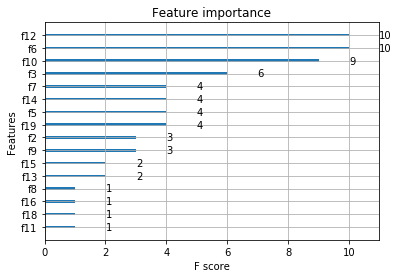

In [28]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt


xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Random Forrest


In [90]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1-score",metrics.f1_score(y_test, y_pred))
print("AUC",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.9410526315789474
Precision: 0.9456882255389718
Recall: 0.917538213998391
f1-score 0.9314005716619028
AUC 0.9383895177023691


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data1 = pd.DataFrame(scaler.fit(data1.values), columns = data1.columns)
pd.concat((data1, data.project),1)

ValueError: DataFrame constructor not properly called!

In [94]:
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame({'A':[14,90,90,96,91],
                           'B':[103,107,110,114,114]}).astype(float)
data1 = x1.drop('project',1)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)
data2=pd.concat((df_scaled, x1.project),1)

C:\Users\labpc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [95]:
data2.to_csv('significant2.csv')